In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import sklearn as sk
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
import os
from keras.utils import np_utils

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

from keras.regularizers import l2

from keras.preprocessing.text import Tokenizer
from keras.models import load_model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
filenames = ["rawdata_100.pkl"]
t = Tokenizer(num_words=40000)
batch_size = 10
l2_lambda = 0.00001
num_class = 2

randomShuffle = ShuffleSplit(n_splits=1, test_size=.2, random_state=0)
onehot_encoder = OneHotEncoder(sparse=False)

### Data Preprocessing

In [4]:
def getXY(filename_data, num_class):
    data = pd.read_pickle(filename_data)
    print("data: ", data.shape)
    reviewTextList = data.reviewText.values
    t.fit_on_texts(reviewTextList)
    text = t.texts_to_matrix(reviewTextList, mode='count')
    
    data_X = text
    data_Y = data['overall']
    data_Y = np_utils.to_categorical(data_Y, num_class)
    return data_X, data_Y, text.shape[1]

In [5]:
def SVMModel(num_class, input_dim, x_train, x_test, y_train, y_test, batch_size, epochs, name_model):
    print("x_train: ", x_train.shape)
    print("y_train: ", y_train.shape)
    print("x_test: ", x_test.shape)
    print("y_test: ", y_test.shape)
#     print("x_train:",x_train[0])
#     print("x_test:",x_test[0])
#     print('y_train:',y_train[0])
#     print('y_test',y_test[0])
    model = Sequential()
    model.add(Dense(2,input_dim=input_dim,activation='softmax', kernel_regularizer=l2(l2_lambda)))
    print(model.summary())
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    history=model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_test,y_test),
                      )
    score=model.evaluate(x_test,y_test)
    print('Test loss:',score[0])
    print('Test accuracy:',score[1])
    plt.figure('categorical_accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Categorical Accuracy')
    plt.plot(history.history['categorical_accuracy'])
    plt.show()
    y_test=np.argmax(y_test,axis=1)
    y_pred=model.predict_classes(x_test)
    print(classification_report(y_test,y_pred))
    
    model.save(name_model)
    del model

-----------------------------
rawdata_100.pkl:
data:  (102838, 9)
input dimension:  40000
x_train:  (82270, 40000)
y_train:  (82270, 2)
x_test:  (20568, 40000)
y_test:  (20568, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 80002     
Total params: 80,002
Trainable params: 80,002
Non-trainable params: 0
_________________________________________________________________
None
Train on 82270 samples, validate on 20568 samples
Epoch 1/10
82270/82270 [==============================] - 75s 913us/step - loss: 0.3383 - categorical_accuracy: 0.8765 - val_loss: 0.2971 - val_categorical_accuracy: 0.8947
Epoch 2/10
82270/82270 [==============================] - 68s 822us/step - loss: 0.2589 - categorical_accuracy: 0.9065 - val_loss: 0.3022 - val_categorical_accuracy: 0.8919
Epoch 3/10
82270/82270 [==============================] - 66s 801us/step - loss: 0.23

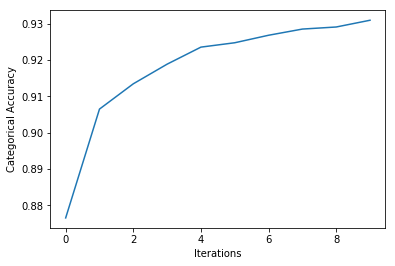

             precision    recall  f1-score   support

          0       0.88      0.89      0.89     10330
          1       0.89      0.88      0.88     10238

avg / total       0.89      0.89      0.89     20568



In [6]:
for filename in filenames:
    print("-----------------------------")
    print(filename + ":")
    X, Y, input_dim = getXY(filename, num_class)
    print("input dimension: ", input_dim)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    SVMModel(num_class, input_dim, X_train, X_test, Y_train, Y_test, batch_size, 10, 'SVM.H5')

In [7]:
model = load_model('SVM.h5')

In [31]:
### The upper only 20000 cases

In [ ]:
### ussing adversial model

In [6]:
filename_adv = "data_adversial_wordnet.pkl"
num_class = 2
model = load_model('SVM.h5')
X_test_adv, Y_test_adv, input_dim_test_adv = getXY(filename_adv, num_class)

In [7]:
score=model.evaluate(X_test_adv,Y_test_adv)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
Y_test_adv=np.argmax(Y_test_adv,axis=1)
Y_pred_adv=model.predict_classes(X_test_adv)
print(classification_report(Y_test_adv,Y_pred_adv))

102664/102664 [==============================] - 68s 661us/step
Test loss: 1.91724966986
Test accuracy: 0.472151874075
             precision    recall  f1-score   support

          0       0.47      0.51      0.49     51319
          1       0.47      0.44      0.45     51345

avg / total       0.47      0.47      0.47    102664

